In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

# Visualising Patterns in Time-Series Data: 2D Overlay Plots

This is the example notebook for the medium article found here:  
https://towardsdatascience.com/visualising-patterns-in-time-series-data-2d-overlay-plots-fb8920139044

## An Initial Look at the Data

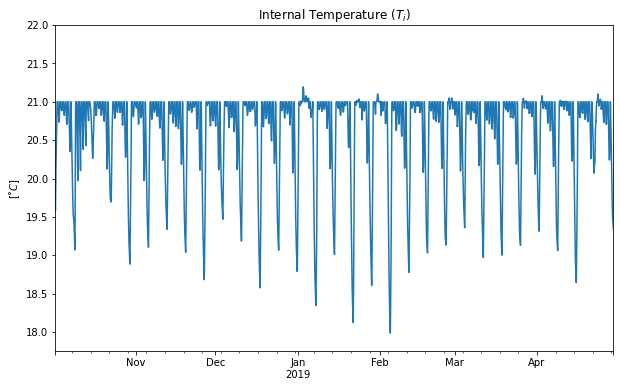

In [2]:
# load the data
df = pd.read_csv('./data/Ti_data.csv', index_col=0, parse_dates=True)

# plot the data
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

df.plot(ax=ax, color='C0', legend=None)

ax.set_ylim(17.75, 22)
ax.set_ylabel('$[˚C]$')
ax.set_title('Internal Temperature $(T_i)$');


# Visualising Diurnal Patterns

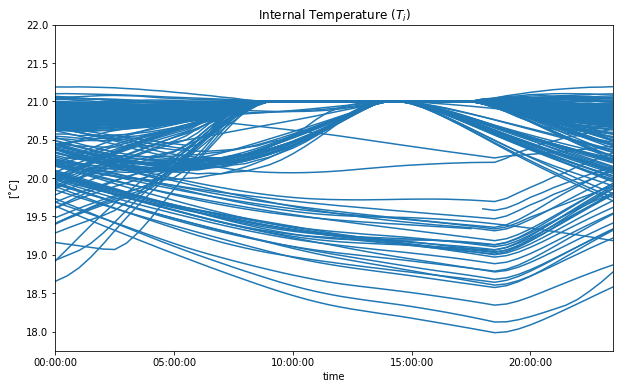

In [3]:
# load the data
df = pd.read_csv('./data/Ti_data.csv', index_col=0, parse_dates=True)

# data pre-processing: pivot
df['date'] = df.index.normalize()
df['time'] = df.index.time.astype(str)
df_pivot = df.pivot(index='date', columns='time', values='Ti')

# plot the data
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# NOTE: we are plotting the transposed DataFrame
df_pivot.T.plot(ax=ax, color='C0', legend=False)

ax.set_xlim([0, 47])
ax.set_ylim(17.75, 22)
ax.set_ylabel('$[˚C]$')
ax.set_title('Internal Temperature $(T_i)$');


# Getting the Alpha Right

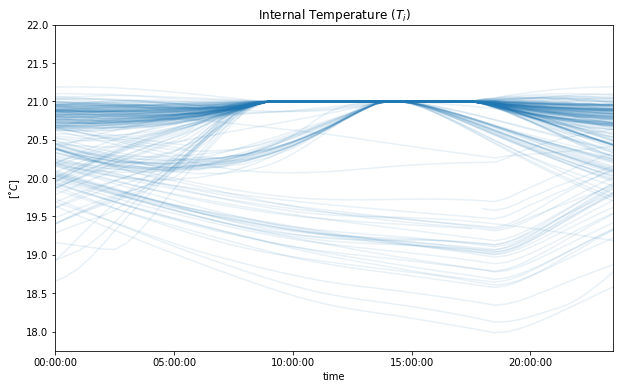

In [4]:
# load the data
df = pd.read_csv('./data/Ti_data.csv', index_col=0, parse_dates=True)

# data pre-processing: pivot
df['date'] = df.index.normalize()
df['time'] = df.index.time.astype(str)
df_pivot = df.pivot(index='date', columns='time', values='Ti')

# plot the data
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# NOTE: we are plotting the transposed DataFrame
df_pivot.T.plot(ax=ax, color='C0', alpha=0.1, legend=False)

ax.set_xlim([0, 47])
ax.set_ylim(17.75, 22)
ax.set_ylabel('$[˚C]$')
ax.set_title('Internal Temperature $(T_i)$');


# Incorporating Domain Knowledge

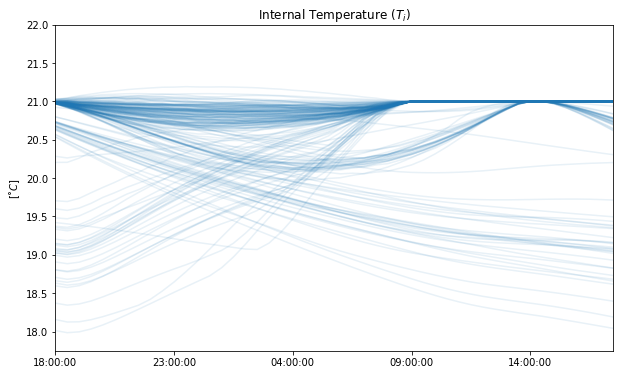

In [5]:
# load the data
df = pd.read_csv('./data/Ti_data.csv', index_col=0, parse_dates=True)

# data pre-processing: pivot
df['date'] = df.index.normalize()
df['time'] = df.index.time.astype(str)
df_pivot = df.pivot(index='date', columns='time', values='Ti')

# roll the DataFrame back by 36 half-hours
# NOTE: the dateindex refers to the heating day
# as seen by the heating system
df_roll = pd.DataFrame(index=df_pivot.index, 
                       columns=np.roll(df_pivot.columns, -36), 
                       data=np.roll(df_pivot.values, -36))

# plot the data
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# NOTE: we are plotting the transposed DataFrame
df_roll.T.plot(ax=ax, color='C0', alpha=0.1, legend=False)

ax.set_xlim([0, 47])
ax.set_ylim(17.75, 22)
ax.set_ylabel('$[˚C]$')
ax.set_title('Internal Temperature $(T_i)$');


# Visualising Diurnal and Weekly Patterns

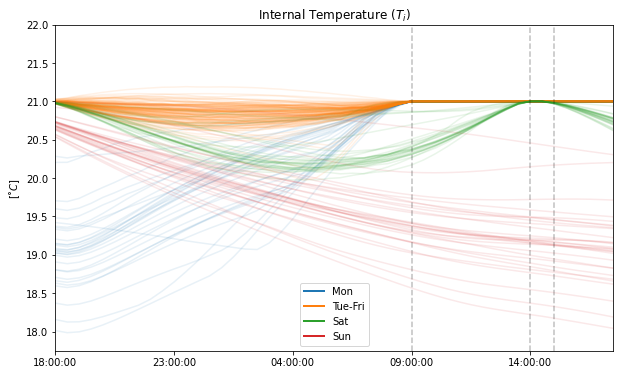

In [6]:
day_colors = { 'Monday': 'C0', 
               'Tuesday': 'C1',
               'Wednesday': 'C1',
               'Thursday': 'C1',
               'Friday': 'C1',
               'Saturday': 'C2',
               'Sunday': 'C3'}

# load the data
df = pd.read_csv('./data/Ti_data.csv', index_col=0, parse_dates=True)

# data pre-processing: pivot
df['date'] = df.index.normalize()
df['time'] = df.index.time.astype(str)
df_pivot = df.pivot(index='date', columns='time', values='Ti')

# roll the DataFrame back by 36 half-hours
# NOTE: the dateindex refers to the heating day
# as seen by the heating system
df_roll = pd.DataFrame(index=np.roll(df_pivot.index, 0), 
                       columns=np.roll(df_pivot.columns, -36), 
                       data=np.roll(df_pivot.values, -36))

# plot the data
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

for day_name, color in day_colors.items():
    # NOTE: we are plotting the transposed DataFrame
    df_roll[df_roll.index.day_name() == day_name].T.plot(
        ax=ax, color=color, alpha=0.1, legend=None)

ax.set_xlim([0, 47])
ax.set_ylim(17.75, 22)

# make the heating schedule clear
ax.axvline(30, alpha=0.25, color='black', linestyle='--')
ax.axvline(40, alpha=0.25, color='black', linestyle='--')
ax.axvline(42, alpha=0.25, color='black', linestyle='--')

ax.set_ylabel('$[˚C]$')
ax.set_title('Internal Temperature $(T_i)$');

# make the legend pretty
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='C0', lw=2),
                Line2D([0], [0], color='C1', lw=2),
                Line2D([0], [0], color='C2', lw=2),
                Line2D([0], [0], color='C3', lw=2)]

ax.legend(custom_lines, ['Mon', 'Tue-Fri', 'Sat', 'Sun']);
